In [2]:
library(rstan)
library(brms)
library(bayesplot)
library(ggfortify)
library(gridExtra)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
source("plotSSM.R", encoding = "utf-8")

In [3]:
sales_df_2  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/5-4-1-sales-ts-2.csv")
head(sales_df_2)

date,sales,publicity
<fct>,<dbl>,<int>
2010-01-01,95.8,0
2010-01-02,83.6,0
2010-01-03,94.1,0
2010-01-04,98.1,0
2010-01-05,122.8,1
2010-01-06,96.2,0


In [4]:
summary(sales_df_2)

         date        sales         publicity   
 2010-01-01: 1   Min.   : 83.6   Min.   :0.00  
 2010-01-02: 1   1st Qu.:123.3   1st Qu.:1.00  
 2010-01-03: 1   Median :131.7   Median :2.00  
 2010-01-04: 1   Mean   :131.6   Mean   :2.12  
 2010-01-05: 1   3rd Qu.:143.8   3rd Qu.:3.00  
 2010-01-06: 1   Max.   :178.0   Max.   :8.00  
 (Other)   :94                                 

In [5]:
sales_df_2$date <- as.POSIXct(sales_df_2$date)

In [6]:
head(sales_df_2)

date,sales,publicity
<dttm>,<dbl>,<int>
2010-01-01,95.8,0
2010-01-02,83.6,0
2010-01-03,94.1,0
2010-01-04,98.1,0
2010-01-05,122.8,1
2010-01-06,96.2,0


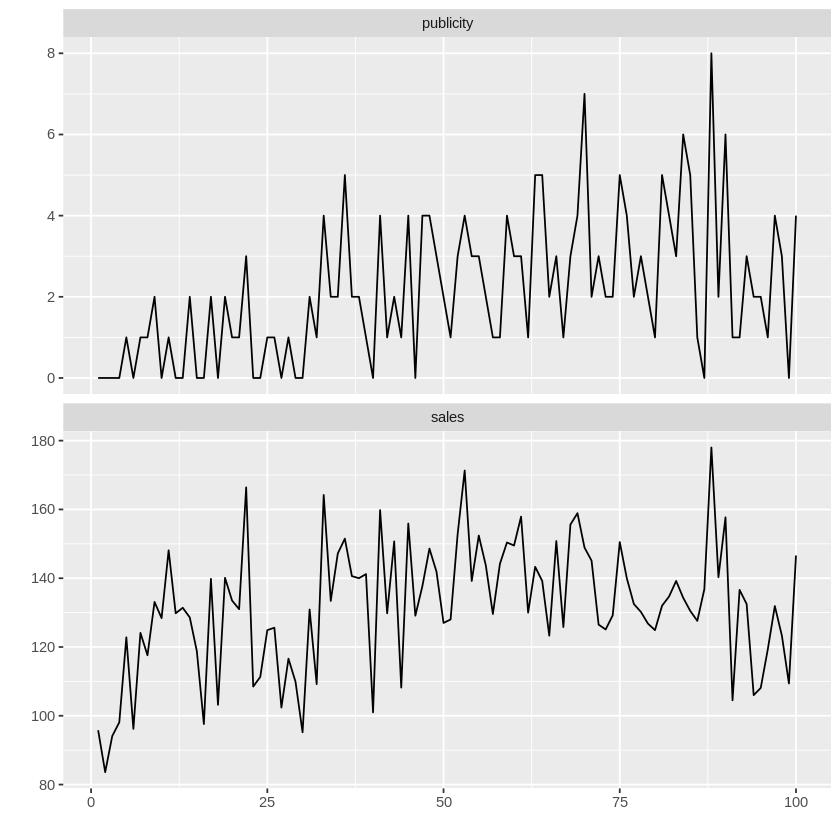

In [7]:
autoplot(ts(sales_df_2[ , -1]))

In [8]:
sales_df_2

date,sales,publicity
<dttm>,<dbl>,<int>
2010-01-01,95.8,0
2010-01-02,83.6,0
2010-01-03,94.1,0
2010-01-04,98.1,0
2010-01-05,122.8,1
2010-01-06,96.2,0
2010-01-07,124.1,1
2010-01-08,117.6,1
2010-01-09,133.1,2


In [9]:
sales_df_2[ , -1]

sales,publicity
<dbl>,<int>
95.8,0
83.6,0
94.1,0
98.1,0
122.8,1
96.2,0
124.1,1
117.6,1
133.1,2


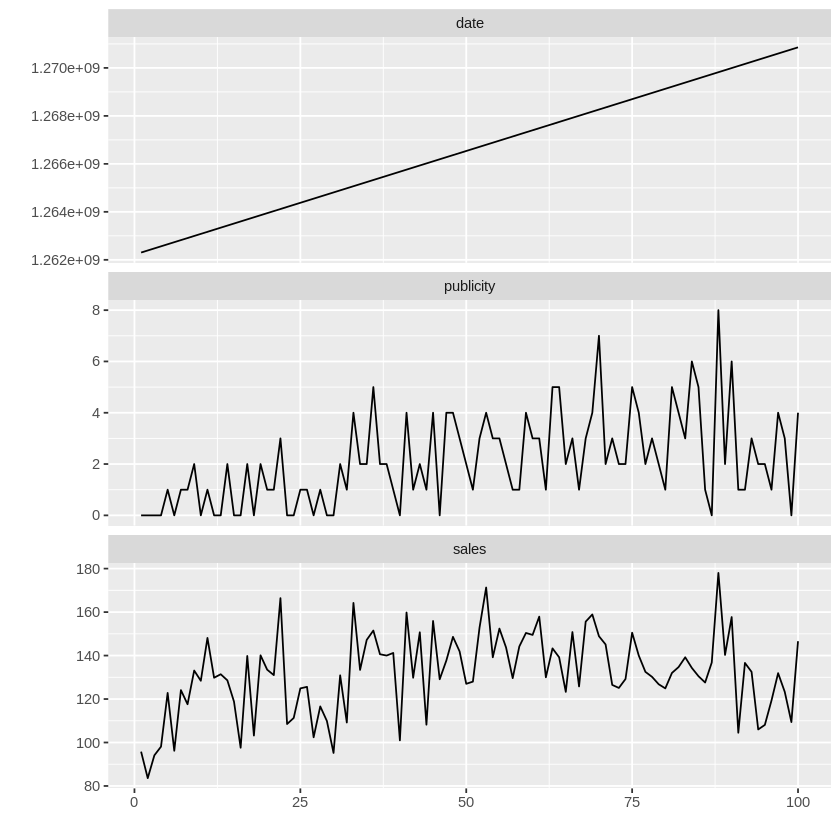

In [10]:
autoplot(ts(sales_df_2))

In [11]:
ts(sales_df_2)

,date,sales,publicity
1,1262304000,95.8,0
2,1262390400,83.6,0
3,1262476800,94.1,0
4,1262563200,98.1,0
5,1262649600,122.8,1
6,1262736000,96.2,0
7,1262822400,124.1,1
8,1262908800,117.6,1
9,1262995200,133.1,2
10,1263081600,128.4,0


In [18]:
ts(sales_df_2[, -1], start=c(as.POSIXct("2010-01-01")), end = c(as.POSIXct("2010-04-10")), freq = 1)

ERROR: Error in attr(data, "tsp") <- c(start, end, frequency): invalid time series parameters specified


In [15]:
max(sales_df_2[])

ERROR: Error in FUN(X[[i]], ...): only defined on a data frame with all numeric variables
